In [13]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)

import matplotlib.pyplot as plt
import numpy as np

##### Step0: prepare data

Choose 5000 true and 5000 false randomly from new_copy(hazardous), save these data to "neo_new.csv".

In [ ]:
table = MyPyTable().load_from_file("dataset//neo_copy.csv")
sampled_data = table.get_sample_data("hazardous", 5000, 5000)
sampled_table = MyPyTable(column_names=table.column_names, data=sampled_data)
sampled_table.save_to_file("dataset//neo_new.csv")

In [15]:
df = MyPyTable().load_from_file("dataset//neo_new.csv")

header = df.column_names
est_diameter_min = df.get_column("est_diameter_min")
est_diameter_max = df.get_column("est_diameter_max")
relative_velocity = df.get_column("relative_velocity")
miss_distance = df.get_column("miss_distance")
absolute_magnitude = df.get_column("absolute_magnitude")

hazardous = df.get_column("hazardous")
hazardous_num = [0 if val == "False" else 1 for val in hazardous]

##### Step1: attribute property

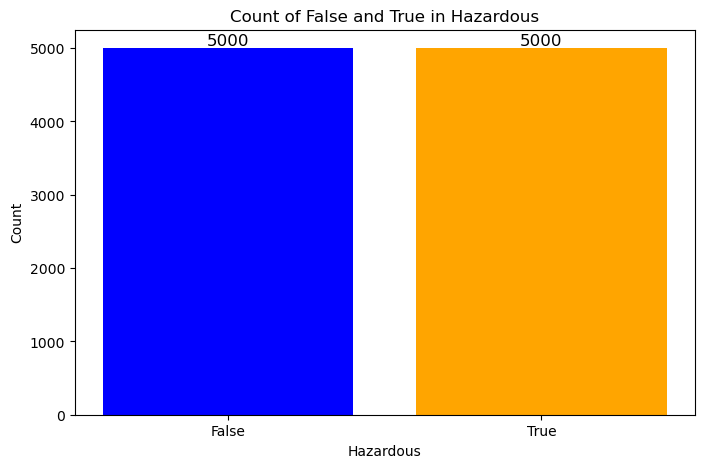

In [16]:
false_count = hazardous.count("False")
true_count = hazardous.count("True")

categories = ['False', 'True']
counts = [false_count, true_count]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=12)

plt.title("Count of False and True in Hazardous")
plt.xlabel("Hazardous")
plt.ylabel("Count")

plt.show()

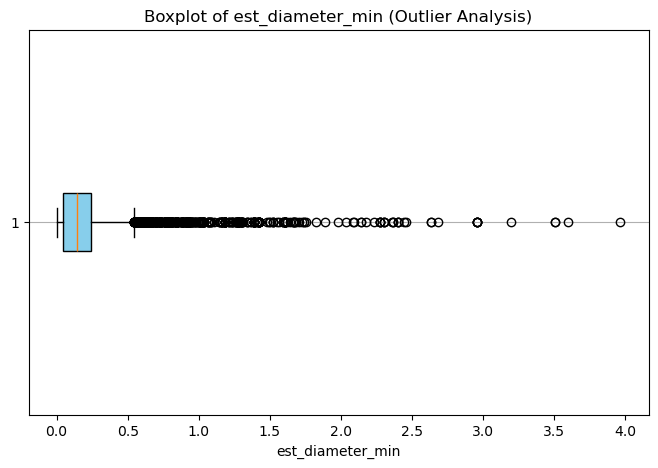

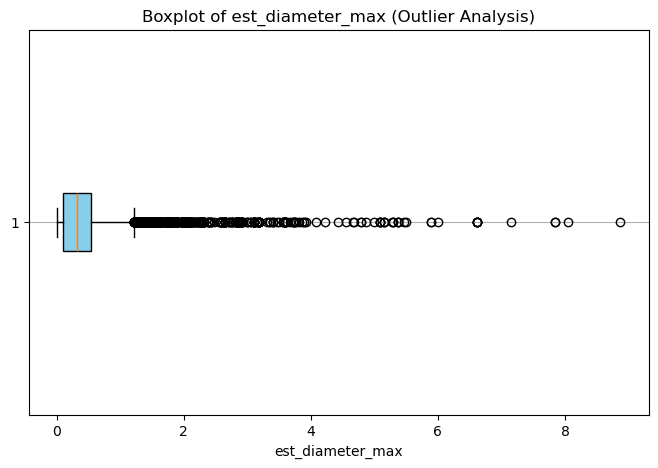

In [17]:
# Boxplot, find noisy
plt.figure(figsize=(8, 5))
plt.boxplot(est_diameter_min, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Boxplot of est_diameter_min (Outlier Analysis)")
plt.xlabel("est_diameter_min")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(est_diameter_max, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Boxplot of est_diameter_max (Outlier Analysis)")
plt.xlabel("est_diameter_max")
plt.grid(axis='y')
plt.show()


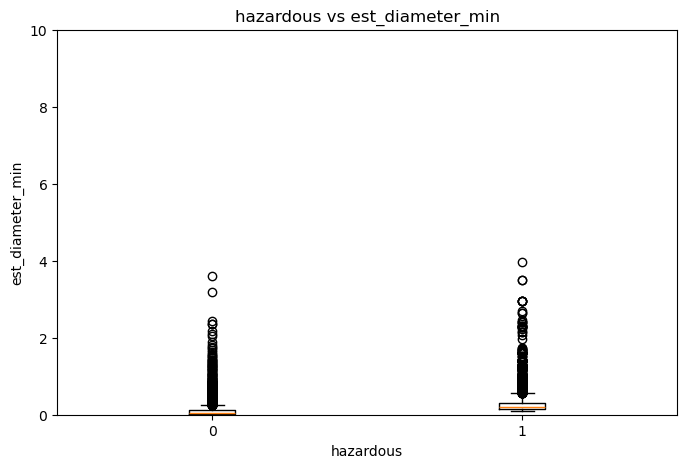

In [18]:
data_0 = [est_diameter_min[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [est_diameter_min[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs est_diameter_min")
plt.xlabel("hazardous")
plt.ylabel("est_diameter_min")
plt.ylim(0, 10)
plt.show()

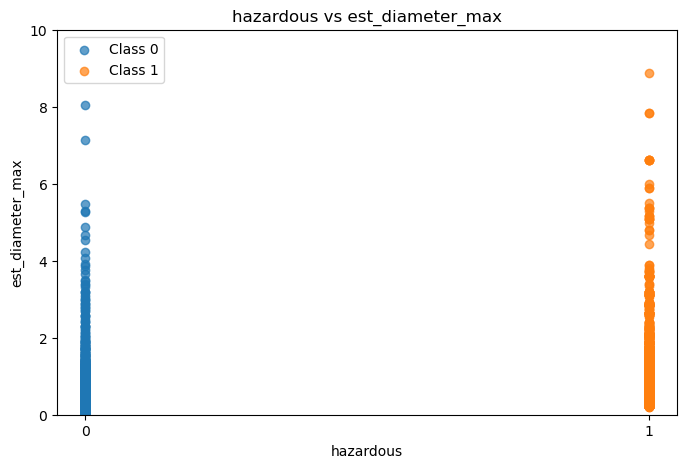

In [19]:
data_0 = [est_diameter_max[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [est_diameter_max[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

x_0 = [0] * len(data_0)
x_1 = [1] * len(data_1) 

plt.figure(figsize=(8, 5))
plt.scatter(x_0, data_0, label="Class 0", alpha=0.7) 
plt.scatter(x_1, data_1, label="Class 1", alpha=0.7)

plt.title("hazardous vs est_diameter_max")
plt.xlabel("hazardous")
plt.ylabel("est_diameter_max")
plt.xticks([0, 1], ['0', '1'])
plt.ylim(0, 10)
plt.legend()
plt.show()

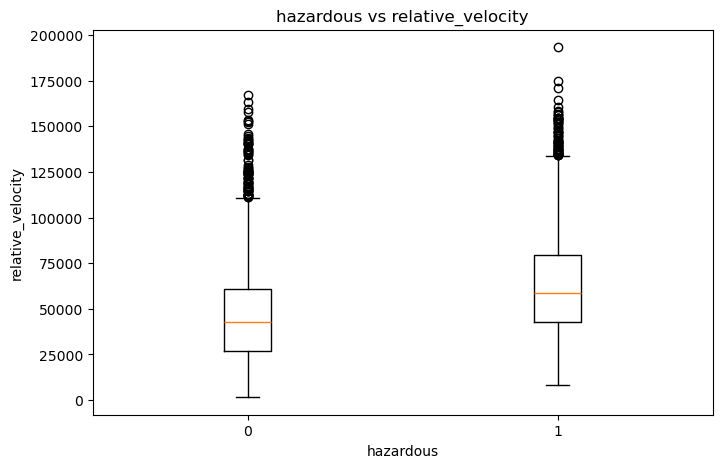

In [20]:
data_0 = [relative_velocity[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [relative_velocity[i] for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs relative_velocity")
plt.xlabel("hazardous")
plt.ylabel("relative_velocity")
plt.show()

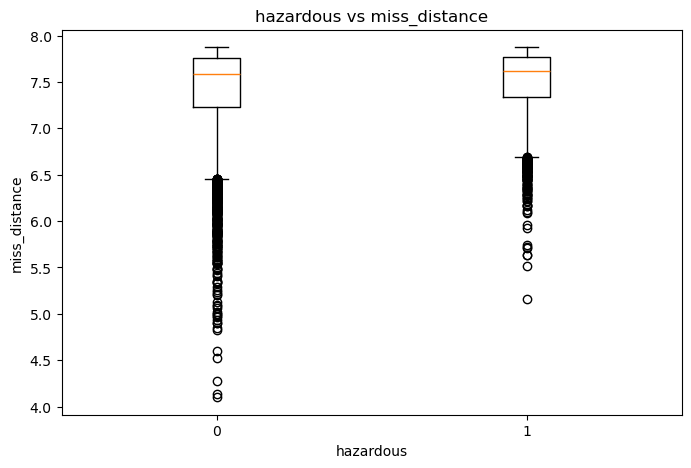

In [21]:
data_0 = [np.log10(miss_distance[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [np.log10(miss_distance[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs miss_distance")
plt.xlabel("hazardous")
plt.ylabel("miss_distance")
plt.show()

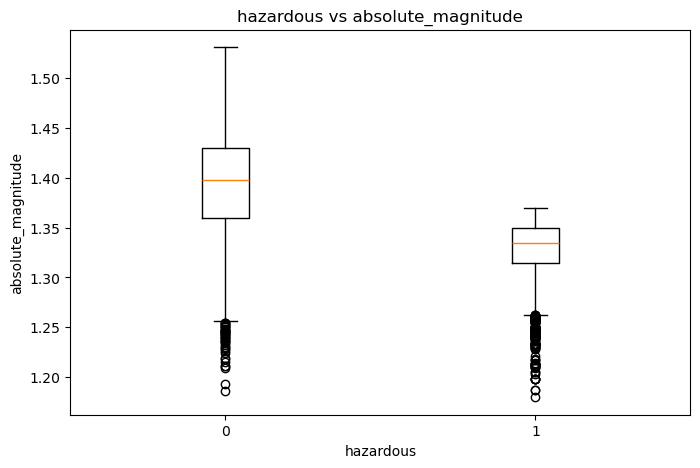

In [22]:
data_0 = [np.log10(absolute_magnitude[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 0]  
data_1 = [np.log10(absolute_magnitude[i] + 1) for i in range(len(hazardous_num)) if hazardous_num[i] == 1] 

plt.figure(figsize=(8, 5))
plt.boxplot([data_0, data_1], labels=['0', '1']) 
plt.title("hazardous vs absolute_magnitude")
plt.xlabel("hazardous")
plt.ylabel("absolute_magnitude")
plt.show()

##### step2: knn performance

In [23]:
# try only est_diameter_min as X here
X = []
for i in range(len(est_diameter_min)):
    temp = []
    temp.append(est_diameter_min[i])
    X.append(temp)

y_pred_knn, _, _, _ = myutils.cross_val_predict3(X, hazardous_num, 2, True, 1)
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_knn, None, "knn")

Processing fold 1/2...
Processing fold 2/2...
knn Confusion Matrix:
+----+------+------+---------+-------------------+
|    |    0 |    1 |   Total | Recognition (%)   |
+====+======+======+=========+===================+
|  0 | 4624 |  376 |    5000 | 92.48%            |
+----+------+------+---------+-------------------+
|  1 | 3033 | 1967 |    5000 | 39.34%            |
+----+------+------+---------+-------------------+
knn Performance Metrics:
Accuracy: 0.66
Error: 0.34
Precision: 0.60
Recall: 0.92
F1 Score: 0.73



In [24]:
# X combines all the attributes we choose
X = []
for i in range(len(est_diameter_min)):
    temp = []
    temp.append(est_diameter_min[i])
    temp.append(est_diameter_max[i])
    temp.append(miss_distance[i])
    temp.append(relative_velocity[i])
    X.append(temp)

y_pred_knn, _, _, _ = myutils.cross_val_predict3(X, hazardous_num, 2, True, 1)
myutils.evaluate_and_display_metrics(hazardous_num, y_pred_knn, None, "knn")

Processing fold 1/2...
Processing fold 2/2...
knn Confusion Matrix:
+----+------+------+---------+-------------------+
|    |    0 |    1 |   Total | Recognition (%)   |
+====+======+======+=========+===================+
|  0 | 2695 | 2305 |    5000 | 53.90%            |
+----+------+------+---------+-------------------+
|  1 | 2268 | 2732 |    5000 | 54.64%            |
+----+------+------+---------+-------------------+
knn Performance Metrics:
Accuracy: 0.54
Error: 0.46
Precision: 0.54
Recall: 0.54
F1 Score: 0.54

